# Recommendations Systems

Recommendation systems play a crucial role in the success of streaming platforms by providing personalized content suggestions to users and increasing user engagement. Streaming platforms, such as Netflix and  Disney+, uses these systems to recommend movies and TV shows based on the user's previous viewing history.


## What is a Recommendation System?

A recommendation system is an artificial intelligence technology that suggests items or content to users based on their preferences and behaviors. It is used by many online platforms such as e-commerce websites, music streaming services, social media networks, and video sharing platforms.

A recommendation can be based on various criteria, including past purchases, search history, demographic information, and other factors. The goal of a recommendation system is to improve the user experience by offering personalized suggestions that the user is more likely to find interesting and relevant. 

## Types of Recommendation Systems

Most recommendation systems and techniques fall into these  three categories:

- **Content-based filtering**: They use attributes or features of an item to recommend other items similar to the user’s preferences;

- **Collaborative filtering**: This approach recommends items based on similar preferences of other users, given previous interactions between users and items;

- **Hybrid recommender systems**: combine the advantages of the types above to create a more personalized, and comprehensive recommending system.

# Data and Libary imports


## Libary imports

In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

## Titles imports

In [2]:
amazon_titles = pd.read_csv("data/amazon/titles.csv")
appletv_titles = pd.read_csv("data/appletv/titles.csv")
disney_titles = pd.read_csv("data/disney/titles.csv")
hbo_titles = pd.read_csv("data/hbo/titles.csv")
netflix_titles = pd.read_csv("data/netflix/titles.csv")
paramount_titles = pd.read_csv("data/paramount/titles.csv")

## Concatenation

In [3]:
titles = pd.concat([amazon_titles, appletv_titles, disney_titles, hbo_titles, netflix_titles, paramount_titles], axis = 0).reset_index()
titles.drop(['index'], axis=1, inplace=True)

In [4]:
# Seeing if we have duplicates
titles[titles.duplicated() == True].head(5)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
11326,tm57241,Never Been Kissed,MOVIE,"Josie Geller, a baby-faced junior copywriter a...",1999,PG-13,107,"['comedy', 'drama', 'romance']",['US'],NaN,tt0151738,6.0,93264.0,21.357,6.200
11392,ts22130,Rolie Polie Olie,SHOW,Rolie Polie Olie was a children's television s...,1998,TV-Y,21,"['animation', 'family', 'fantasy', 'scifi', 'c...","['FR', 'US', 'GB', 'CA']",6.0,tt0172049,6.3,3012.0,13.848,6.600
11591,tm98015,The Last Song,MOVIE,A drama centered on a rebellious girl who is s...,2010,PG,107,"['drama', 'romance', 'music']",['US'],NaN,tt1294226,6.0,89378.0,15.081,7.242
11618,ts22233,Shake It Up,SHOW,Best pals CeCe and Rocky dream of dancing star...,2010,TV-G,25,"['comedy', 'family']",['US'],3.0,tt1661326,8.0,88.0,41.672,7.800
11827,ts7273,Doc McStuffins,SHOW,A young African-American girl aspires to be a ...,2012,TV-G,22,"['music', 'animation', 'family', 'fantasy']",['US'],6.0,tt1710295,6.6,2552.0,35.228,5.800


In [5]:
# Dropping duplicates
titles.drop_duplicates(inplace=True)

In [6]:
titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,"['drama', 'comedy', 'family', 'fantasy', 'roma...",['US'],NaN,tt0038650,8.6,467766.0,27.611,8.261
1,tm143047,Duck Soup,MOVIE,Rufus T. Firefly is named president/dictator o...,1933,NaN,69,"['comedy', 'war']",['US'],NaN,tt0023969,7.8,60933.0,9.013,7.357
2,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['drama', 'romance', 'comedy']",['US'],NaN,tt0032599,7.8,60244.0,14.759,7.433
3,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family']",['US'],26.0,tt0850645,8.5,1149.0,15.424,7.600
4,tm5012,Red River,MOVIE,Headstrong Thomas Dunson starts a thriving Tex...,1948,NaN,133,"['western', 'drama', 'romance', 'action']",['US'],NaN,tt0040724,7.8,32210.0,12.400,7.400


# Cleaning the Data

## Seeing how many null values

First, let's see how many non-null values we have for each column

In [7]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23366 entries, 0 to 25250
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    23366 non-null  object 
 1   title                 23366 non-null  object 
 2   type                  23366 non-null  object 
 3   description           23182 non-null  object 
 4   release_year          23366 non-null  int64  
 5   age_certification     11397 non-null  object 
 6   runtime               23366 non-null  int64  
 7   genres                23366 non-null  object 
 8   production_countries  23366 non-null  object 
 9   seasons               5629 non-null   float64
 10  imdb_id               21418 non-null  object 
 11  imdb_score            20812 non-null  float64
 12  imdb_votes            20752 non-null  float64
 13  tmdb_popularity       22649 non-null  float64
 14  tmdb_score            20381 non-null  float64
dtypes: float64(5), int6

We have some gaps in each column, let's see how many null values are for each column

In [8]:
titles.isna().sum()

id                          0
title                       0
type                        0
description               184
release_year                0
age_certification       11969
runtime                     0
genres                      0
production_countries        0
seasons                 17737
imdb_id                  1948
imdb_score               2554
imdb_votes               2614
tmdb_popularity           717
tmdb_score               2985
dtype: int64

To get a better understanging of the picture, let's use [missingno](https://github.com/ResidentMario/missingno) to see the missing data in our dataset:

Text(0.5, 1.0, 'Distribution of Missing Values')

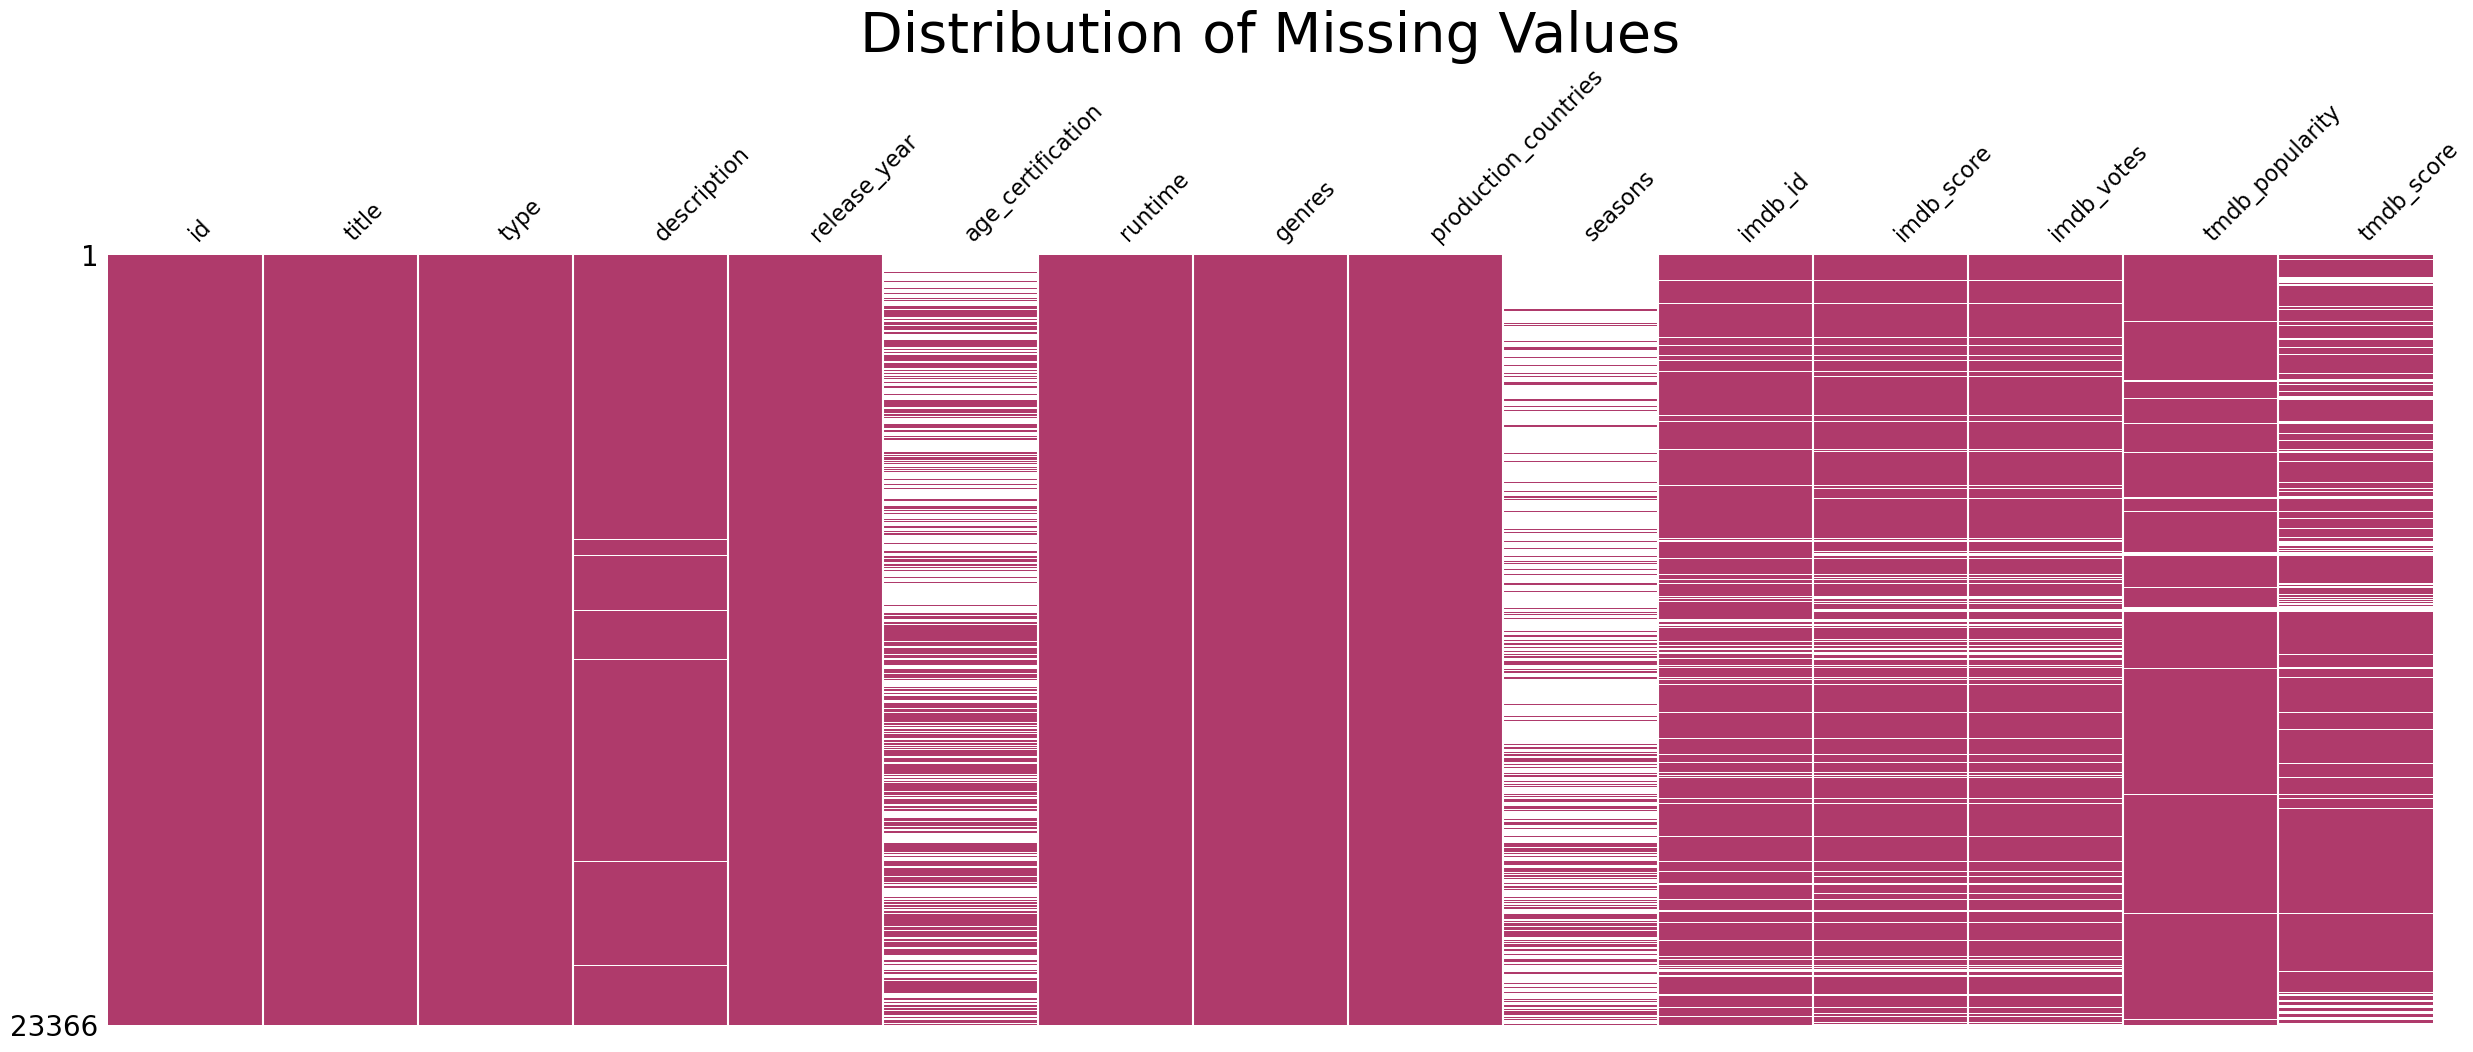

In [9]:
msno.matrix(titles, sparkline=False, figsize=(30,10), color=(0.69,0.23,0.42))
plt.title('Distribution of Missing Values', fontsize=40)

## Handling the 'genres' and 'production_countries' columns

These two columns are formed by list values, so we need to handle these values to work with a single value.

In [10]:
# For genres
titles['genres'] = titles['genres'].str.replace(r'[','').str.replace(r"'",'').str.replace(r']','')
titles['genre'] = titles['genres'].str.split(',').str[0]

# For countries
titles['production_countries'] = titles['production_countries'].str.replace(r"[", '').str.replace(r"'", '').str.replace(r"]", '')
titles['production_country'] = titles['production_countries'].str.split(',').str[0]


C:\Users\diego\AppData\Local\Temp\ipykernel_13848\2497750954.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  titles['genres'] = titles['genres'].str.replace(r'[','').str.replace(r"'",'').str.replace(r']','')
C:\Users\diego\AppData\Local\Temp\ipykernel_13848\2497750954.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  titles['production_countries'] = titles['production_countries'].str.replace(r"[", '').str.replace(r"'", '').str.replace(r"]", '')


In [11]:
titles.drop(['genres', 'production_countries'], axis=1, inplace=True)

In [12]:
titles.head()

,id,title,type,description,release_year,age_certification,runtime,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre,production_country
0,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,NaN,tt0038650,8.6,467766.0,27.611,8.261,drama,US
1,tm143047,Duck Soup,MOVIE,Rufus T. Firefly is named president/dictator o...,1933,NaN,69,NaN,tt0023969,7.8,60933.0,9.013,7.357,comedy,US
2,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,NaN,tt0032599,7.8,60244.0,14.759,7.433,drama,US
3,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,26.0,tt0850645,8.5,1149.0,15.424,7.600,comedy,US
4,tm5012,Red River,MOVIE,Headstrong Thomas Dunson starts a thriving Tex...,1948,NaN,133,NaN,tt0040724,7.8,32210.0,12.400,7.400,western,US


In [13]:
titles['genre'].unique()

array(['drama', 'comedy', 'western', 'war', 'scifi', 'romance', 'action',
       'fantasy', 'horror', 'crime', 'history', 'music', 'thriller',
       'documentation', '', 'family', 'reality', 'animation', 'sport',
       'european'], dtype=object)

In [14]:
titles['production_country'].unique()

array(['US', 'GB', 'SU', 'DE', 'MX', 'CA', 'IN', '', 'SE', 'HK', 'IT',
       'FR', 'JP', 'NL', 'PR', 'ES', 'IE', 'CH', 'RO', 'XC', 'TW', 'CO',
       'MC', 'KR', 'IL', 'PH', 'EG', 'YU', 'RU', 'BD', 'AU', 'NZ', 'CN',
       'ZA', 'LI', 'GR', 'DK', 'CZ', 'IR', 'PT', 'BE', 'AR', 'ID', 'VE',
       'GH', 'AT', 'NO', 'BG', 'TH', 'PL', 'AE', 'AF', 'JM', 'RS', 'SK',
       'SG', 'BR', 'HU', 'CL', 'LT', 'UA', 'QA', 'KZ', 'NG', 'ZM', 'IS',
       'DO', 'TR', 'VN', 'SO', 'BO', 'FI', 'DZ', 'MT', 'GE', 'ET', 'LU',
       'TT', 'MA', 'BY', 'MY', 'PK', 'PE', 'XK', 'TC', 'SV', 'KE', 'LB',
       'NP', 'MN', 'NI', 'CR', 'PA', 'UZ', 'NA', 'AZ', 'KH', 'CM', 'EE',
       'CU', 'AL', 'IQ', 'BM', 'UY', 'HR', 'OM', 'HN', 'JO', 'EC', 'IO',
       'MK', 'SI', 'KI', 'GT', 'BW', 'SN', 'PS', 'SA', 'SY', 'GL', 'TN',
       'CD', 'KW', 'PY', 'TZ', 'ZW', 'MU', 'SB'], dtype=object)

We can see that in both columns we have an empty value. Let's fill these values with NaN to make it easier to deal with in the future.

In [15]:
titles['genre'] = titles['genre'].replace('', np.nan)
titles['production_country'] = titles['production_country'].replace('',np.nan)

## Handling the 'seasons' column

Now let's deal with the 'seasons' column. At first glance, we can say that all the null values are of type 'MOVIE'. Let's see if this is true by comparing the number of null values with the number of movie titles that do not have a value in 'seasons'.

In [16]:
len(titles.loc[(titles['seasons'].isna()) & (titles['type'] == 'MOVIE')]) == titles.seasons.isna().sum()

True

So, all the null values from 'season' is from movies. Let's change the null values to 0.

In [17]:
titles['seasons'].fillna(0, inplace=True)

In [18]:
titles.head()

,id,title,type,description,release_year,age_certification,runtime,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre,production_country
0,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,0.0,tt0038650,8.6,467766.0,27.611,8.261,drama,US
1,tm143047,Duck Soup,MOVIE,Rufus T. Firefly is named president/dictator o...,1933,NaN,69,0.0,tt0023969,7.8,60933.0,9.013,7.357,comedy,US
2,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,0.0,tt0032599,7.8,60244.0,14.759,7.433,drama,US
3,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,26.0,tt0850645,8.5,1149.0,15.424,7.600,comedy,US
4,tm5012,Red River,MOVIE,Headstrong Thomas Dunson starts a thriving Tex...,1948,NaN,133,0.0,tt0040724,7.8,32210.0,12.400,7.400,western,US


## Handling the rest of the null values

Let's see how many null values are left

In [19]:
titles.isna().sum()

id                        0
title                     0
type                      0
description             184
release_year              0
age_certification     11969
runtime                   0
seasons                   0
imdb_id                1948
imdb_score             2554
imdb_votes             2614
tmdb_popularity         717
tmdb_score             2985
genre                   365
production_country      422
dtype: int64

Now, let's drop the 'id', the 'imdb_id', and 'age_certification' columns.

In [20]:
titles.drop(['id','imdb_id','age_certification'], axis=1,inplace=True)

Let's also get rid of some NaN values that are still left in our dataset.

In [21]:
titles.dropna(inplace=True)

In [22]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18601 entries, 0 to 25248
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               18601 non-null  object 
 1   type                18601 non-null  object 
 2   description         18601 non-null  object 
 3   release_year        18601 non-null  int64  
 4   runtime             18601 non-null  int64  
 5   seasons             18601 non-null  float64
 6   imdb_score          18601 non-null  float64
 7   imdb_votes          18601 non-null  float64
 8   tmdb_popularity     18601 non-null  float64
 9   tmdb_score          18601 non-null  float64
 10  genre               18601 non-null  object 
 11  production_country  18601 non-null  object 
dtypes: float64(5), int64(2), object(5)
memory usage: 1.8+ MB


We can see that we still have 18601 values remaining.

Now, with the clean data, we can create our Recommendation System.

In [23]:
#Saving the data for future use
if not os.path.exists('data/clean'):
            os.mkdir('data/clean')

titles.to_csv('data/clean/title.csv')

# Content Based Recommender



## Plot description based Recommender



In this kernel, we will build a recommendation system based on the description of titles. We will calculate pairwise similarity scores for all movies/tv shows based on their descriptions and recommend titles with similar scores.

In [24]:
titles['description'].head()

0    A holiday favourite for generations...  George...
1    Rufus T. Firefly is named president/dictator o...
2    Hildy, the journalist former wife of newspaper...
3    The Three Stooges were an American vaudeville ...
4    Headstrong Thomas Dunson starts a thriving Tex...
Name: description, dtype: object

## Separating the data in Movies and TV Shows

I am separating the data in Movies and TV Shows, to create separate recommendation systems.

In [25]:
movies = titles[titles['type'] == 'MOVIE'].copy().reset_index()
movies.drop(['index'], axis=1, inplace=True)

shows = titles[titles['type'] == 'SHOW'].copy().reset_index()
shows.drop(['index'], axis=1, inplace=True)

In [26]:
movies.head()

,title,type,description,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre,production_country
0,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,130,0.0,8.6,467766.0,27.611,8.261,drama,US
1,Duck Soup,MOVIE,Rufus T. Firefly is named president/dictator o...,1933,69,0.0,7.8,60933.0,9.013,7.357,comedy,US
2,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,92,0.0,7.8,60244.0,14.759,7.433,drama,US
3,Red River,MOVIE,Headstrong Thomas Dunson starts a thriving Tex...,1948,133,0.0,7.8,32210.0,12.400,7.400,western,US
4,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1947,171,0.0,8.1,66209.0,16.056,7.838,war,US


In [27]:
shows.head()

,title,type,description,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre,production_country
0,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,19,26.0,8.5,1149.0,15.424,7.600,comedy,US
1,The Jack Benny Program,SHOW,Laugh along with funnyman Jack Benny as he bri...,1950,30,21.0,8.6,1529.0,9.681,7.500,comedy,US
2,What's My Line?,SHOW,Four panelists must determine guests' occupati...,1950,30,18.0,8.5,1658.0,45.113,7.200,reality,US
3,The Avengers,SHOW,The Avengers is a British television series cr...,1961,51,8.0,8.3,8195.0,42.586,7.853,scifi,GB
4,The Bob Newhart Show,SHOW,The Bob Newhart Show is an American situation ...,1972,29,6.0,8.1,6171.0,11.416,7.700,comedy,US


Now we'll compute Term Frequency-Inverse Document Frequency ([TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf)) vectors for each description.

In [28]:
#Define a TF-IDF Vectorizer Object. 
#This remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix_movies = tfidf.fit_transform(movies['description'])
tfidf_matrix_shows = tfidf.fit_transform(shows['description'])

#Output the shape of tfidf_matrix
print(f'Shape for Movies: {tfidf_matrix_movies.shape}')
print(f'Shape for Shows: {tfidf_matrix_shows.shape}')

Shape for Movies: (14027, 35301)
Shape for Shows: (4574, 19442)


We see that over **35k** different words were used to describe the 14027 titles in our movies dataset, and **19k** different words to describe the 4574 titles in our shows dataset.

Now, we need to calculate the similarity score. We will be using the [cosine similarity](https://en.wikipedia.org/wiki/Cosine_similarity) to calculate a numeric quantity that denotes the similarity between two movies/shows. 

In [29]:
# Compute the cosine similarity matrix
cosine_sim_movies = linear_kernel(tfidf_matrix_movies, tfidf_matrix_movies)
cosine_sim_shows = linear_kernel(tfidf_matrix_shows, tfidf_matrix_shows)

Now we create a way to identify the index of a movie/show in our data, given its title.

In [30]:
indices_movies = pd.Series(movies.index, index=movies['title'])
indices_shows = pd.Series(shows.index, index=shows['title'])

In [31]:
def test_title(title,indices):
    """
    Function that gets the 'index searcher' and searches
    the user's title index.
    """
    
    try:
        index = indices[title]
    except:
        print("\n  Title not found")
        return

    if isinstance(index, np.int64):
        return index
    
    else:
        rt = 0
        print("Select a title: ")
        for i in range(len(index)):
            print(f"{i} - {movies['title'].iloc[index[i]]}", end=' ')
            print(f"({movies['release_year'].iloc[index[i]]})")
        rt = int(input())
        return index[rt]

Now, we define functions that accept a movie/show title as input and produce a list of the 10 most similar titles.

In [32]:

def get_recommendations_movie(title, cosine_sim=cosine_sim_movies):
    """
    A function that takes a movie title as input and prints on the screen
    the 10 most similar movies based on the input description.
    """    
    
    title = test_title(title, indices_movies)
    idx = indices_movies[title]
      
    print(f"Title: {movies['title'].iloc[idx]} |  Year: {movies['release_year'].iloc[idx]}")

    print('**' * 40)

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    print(movies[['title', 'release_year']].iloc[movie_indices])

    print('**' * 40)

In [33]:
def get_recommendations_show(title, cosine_sim=cosine_sim_shows):
    """
    A function that takes a show title as input and prints on the screen
    the 10 most similar shows based on the input description.
    """
    
    title = test_title(title, indices_shows)
    idx = indices_shows[title]

    print(f"Title: {shows['title'].iloc[idx]} | Year: {shows['release_year'].iloc[idx]}")

    print('**' * 40)

    # Get the pairwsie similarity scores of all shows with that show
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the shows based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar shows
    sim_scores = sim_scores[1:11]

    # Get the show indices
    show_indices = [i[0] for i in sim_scores]

    print(shows[['title', 'release_year']].iloc[show_indices])

    print('**' * 40)

In [34]:
get_recommendations_movie('Rocky')

Title: Rocky |  Year: 1976
********************************************************************************
                        title  release_year
3726                    Creed          2015
1383                 Rocky IV          1985
771                  Rocky II          1979
2023             Rocky Balboa          2006
1391                  Rocky V          1990
1386                Rocky III          1982
384          Broadway Limited          1941
6411         K.G.F: Chapter 2          2022
1226      The Joe Louis Story          1953
5029  Hello Guru Prema Kosame          2018
********************************************************************************


In [35]:
get_recommendations_show('Narcos')

Title: Narcos | Year: 2015
********************************************************************************
                                    title  release_year
3130                           Seis Manos          2019
3974           The Snitch Cartel: Origins          2021
2036                           It's a Sin          2021
3133      How to Sell Drugs Online (Fast)          2019
3736  Cocaine Cowboys: The Kings of Miami          2021
1134                               Echo 3          2022
538                   Love Me If You Dare          2015
2576                          On My Block          2018
3232                    Playing with Fire          2019
2217                          El Escamoso          2001
********************************************************************************
